## Regression Coefficients are affected by regularisation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

## Read Data

In [2]:
data = pd.read_csv('../UNSW_Train.csv')
data.shape

(175341, 44)

In [3]:
data.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack,is_intrusion
0,0.121478,113.0,0.0,2.0,6,4,258,172,74.087490,252,...,1,1,0,0,0,1,1,0,0,0
1,0.649902,113.0,0.0,2.0,14,38,734,42014,78.473372,62,...,1,2,0,0,0,1,6,0,0,0
2,1.623129,113.0,0.0,2.0,8,16,364,13186,14.170161,62,...,1,3,0,0,0,2,6,0,0,0
3,1.681642,113.0,3.0,2.0,12,12,628,770,13.677108,62,...,1,3,1,1,0,2,1,0,0,0
4,0.449454,113.0,0.0,2.0,10,6,534,268,33.373826,254,...,1,40,0,0,0,2,39,0,0,0


### Train - Test Split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['is_intrusion'], axis=1),
    data['is_intrusion'],
    test_size=0.2,
    random_state=0)

X_train.shape, X_test.shape

((140272, 43), (35069, 43))

Fitting a few logistic regression models with decreasing values for the penalty of the regularisation

In [5]:
scaler = StandardScaler()
scaler.fit(X_train)

coefs_df = []

# we train 4 different models with regularization
penalties = [0.00005, 0.0005, 0.005, 0.05, 0.5]

for c in penalties:   
    
    logit = LogisticRegression(C=c, penalty='l2', random_state=10, max_iter=300)
    logit.fit(scaler.transform(X_train), y_train)
    
    # store the coefficients of the variables in a list
    coefs_df.append(pd.Series(logit.coef_.ravel()))

In [6]:
# Create a dataframe with the coefficients for all
# the variables for the 4 different logistic regression models

coefs = pd.concat(coefs_df, axis=1)
coefs.columns = penalties
coefs.index = X_train.columns
coefs.head(15)

,0.00005,0.00050,0.00500,0.05000,0.50000
dur,0.024385,0.029322,0.032380,0.033828,0.034598
proto,-0.032351,-0.098186,-0.149065,-0.186998,-0.216553
service,0.119626,0.228148,0.301290,0.353876,0.393623
state,0.210396,0.239535,0.263378,0.286771,0.306509
spkts,-0.006688,-0.007967,-0.009269,-0.009446,-0.008554
dpkts,-0.011902,-0.013853,-0.017036,-0.019581,-0.021287
sbytes,0.021056,0.036622,0.050566,0.063795,0.076403
dbytes,0.005361,0.010409,0.010741,0.008942,0.006024
rate,0.119465,0.147856,0.145752,0.142895,0.139759
sttl,0.318447,0.449585,0.537134,0.597450,0.639768


In [7]:
# apply log scale to the penalties (simplifies comparison)

coefs.columns = np.log(penalties)
coefs.head(15)

,-9.903488,-7.600902,-5.298317,-2.995732,-0.693147
dur,0.024385,0.029322,0.032380,0.033828,0.034598
proto,-0.032351,-0.098186,-0.149065,-0.186998,-0.216553
service,0.119626,0.228148,0.301290,0.353876,0.393623
state,0.210396,0.239535,0.263378,0.286771,0.306509
spkts,-0.006688,-0.007967,-0.009269,-0.009446,-0.008554
dpkts,-0.011902,-0.013853,-0.017036,-0.019581,-0.021287
sbytes,0.021056,0.036622,0.050566,0.063795,0.076403
dbytes,0.005361,0.010409,0.010741,0.008942,0.006024
rate,0.119465,0.147856,0.145752,0.142895,0.139759
sttl,0.318447,0.449585,0.537134,0.597450,0.639768


Text(0.5, 1.0, 'Coefficient value vs penalty. Each line corresponds to one variable')

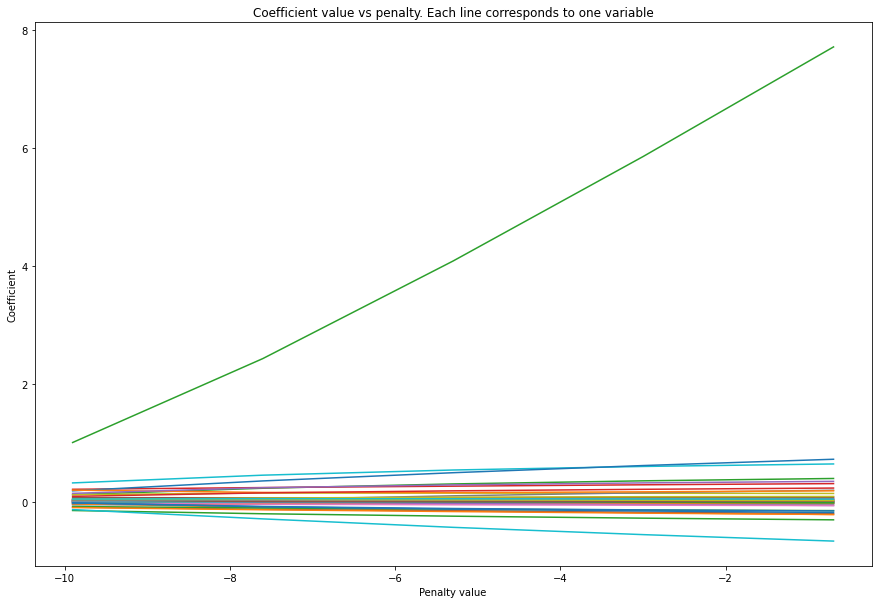

In [8]:
# plot the change in coefficients with the penalty
coefs.T.plot(figsize=(15,10), legend=False)
plt.xlabel('Penalty value')
plt.ylabel('Coefficient')
plt.title('Coefficient value vs penalty. Each line corresponds to one variable')

Text(0.5, 1.0, 'Coefficient value vs penalty')

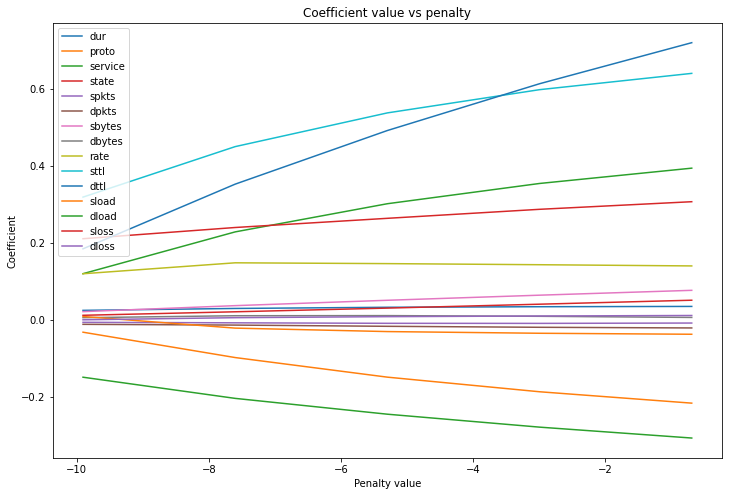

In [9]:
# now I will plot only the first 10 features for better visualisation

temp = coefs.head(15)
temp = temp.T
temp.plot(figsize=(12,8))
plt.xlabel('Penalty value')
plt.ylabel('Coefficient')
plt.title('Coefficient value vs penalty')

Text(0.5, 1.0, 'Coefficient value vs penalty')

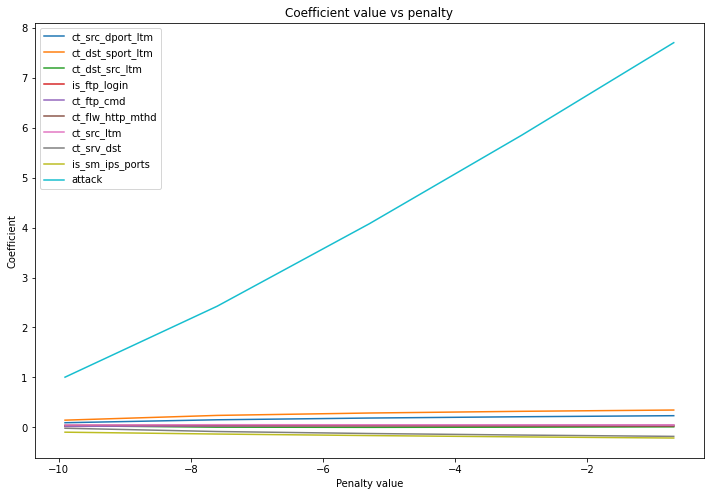

In [10]:
# plot another 10 features for visualisation
temp = coefs.tail(10)
temp = temp.T
temp.plot(figsize=(12,8))
plt.xlabel('Penalty value')
plt.ylabel('Coefficient')
plt.title('Coefficient value vs penalty')

The relationship between features, as inferred from the coefficients, changes depending on the level of regularisation.

In [11]:
coefs.head(15).T.columns

Index(['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss'],
      dtype='object')

In [12]:
X_train = X_train[coefs.head(15).T.columns]
X_test = X_test[coefs.head(15).T.columns]

In [13]:
X_train.shape, X_test.shape

((140272, 15), (35069, 15))

## Standardize Data




In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

## Classifiers





In [15]:
from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier

## Metrics Evaluation




In [16]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, f1_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score

### Logistic Regression




In [17]:
%%time
clf_LR = linear_model.LogisticRegression(n_jobs=-1, random_state=42, C=25).fit(X_train, y_train)

CPU times: user 77.3 ms, sys: 192 ms, total: 269 ms
Wall time: 3.78 s


In [18]:
pred_y_test = clf_LR.predict(X_test)
print('Accuracy:', accuracy_score(y_test, pred_y_test))

f1 = f1_score(y_test, pred_y_test)
print('F1 Score:', f1)

fpr, tpr, thresholds = roc_curve(y_test, pred_y_test)
print('FPR:', fpr[1])
print('TPR:', tpr[1])

Accuracy: 0.3426673130114916
F1 Score: 0.12991620744319468
FPR: 0.08447447981504536
TPR: 0.07224111153087352


### Naive Bayes





In [19]:
%%time
clf_NB = GaussianNB(var_smoothing=1e-08).fit(X_train, y_train)

CPU times: user 526 ms, sys: 43.9 ms, total: 570 ms
Wall time: 72.2 ms


In [20]:
pred_y_testNB = clf_NB.predict(X_test)
print('Accuracy:', accuracy_score(y_test, pred_y_testNB))

f1 = f1_score(y_test, pred_y_testNB)
print('F1 Score:', f1)

fpr, tpr, thresholds = roc_curve(y_test, pred_y_testNB)
print('FPR:', fpr[1])
print('TPR:', tpr[1])

Accuracy: 0.7431349625024951
F1 Score: 0.7884353421954999
FPR: 0.17517339498488352
TPR: 0.7045712126936154


### Random Forest





In [21]:
%%time
clf_RF = RandomForestClassifier(random_state=0,max_depth=100,n_estimators=1000).fit(X_train, y_train)

CPU times: user 1min 42s, sys: 559 ms, total: 1min 42s
Wall time: 1min 42s


In [22]:
pred_y_testRF = clf_RF.predict(X_test)
print('Accuracy:', accuracy_score(y_test, pred_y_testRF))

f1 = f1_score(y_test, pred_y_testRF, average='weighted', zero_division=0)
print('F1 Score:', f1)

fpr, tpr, thresholds = roc_curve(y_test, pred_y_testRF)
print('FPR:', fpr[1])
print('TPR:', tpr[1])

Accuracy: 0.6793179161082438
F1 Score: 0.5495955550990522
FPR: 1.0
TPR: 1.0


### KNN




In [23]:
%%time
clf_KNN = KNeighborsClassifier(algorithm='ball_tree',leaf_size=1,n_neighbors=5,weights='uniform').fit(X_train, y_train)

CPU times: user 9.52 s, sys: 69.6 ms, total: 9.59 s
Wall time: 9.53 s


In [24]:
pred_y_testKNN = clf_KNN.predict(X_test)
print('accuracy_score:', accuracy_score(y_test, pred_y_testKNN))

f1 = f1_score(y_test, pred_y_testKNN)
print('f1:', f1)

fpr, tpr, thresholds = roc_curve(y_test, pred_y_testKNN)
print('fpr:', fpr[1])
print('tpr:', tpr[1])

accuracy_score: 0.7275371410647581
f1: 0.83044380955761
fpr: 0.8119331317801886
tpr: 0.9822020736263275


### CatBoost






In [25]:
%%time
clf_CB = CatBoostClassifier(random_state=0,depth=7,iterations=50,learning_rate=0.04).fit(X_train, y_train)

0:	learn: 0.6625897	total: 65.3ms	remaining: 3.2s
1:	learn: 0.6338904	total: 76.9ms	remaining: 1.84s
2:	learn: 0.6075871	total: 87.2ms	remaining: 1.36s
3:	learn: 0.5831028	total: 96.8ms	remaining: 1.11s
4:	learn: 0.5601194	total: 106ms	remaining: 957ms
5:	learn: 0.5385895	total: 116ms	remaining: 850ms
6:	learn: 0.5190871	total: 125ms	remaining: 769ms
7:	learn: 0.5001852	total: 135ms	remaining: 709ms
8:	learn: 0.4827548	total: 146ms	remaining: 664ms
9:	learn: 0.4662372	total: 155ms	remaining: 619ms
10:	learn: 0.4506484	total: 165ms	remaining: 583ms
11:	learn: 0.4359444	total: 174ms	remaining: 552ms
12:	learn: 0.4221654	total: 184ms	remaining: 523ms
13:	learn: 0.4090037	total: 193ms	remaining: 496ms
14:	learn: 0.3967693	total: 202ms	remaining: 472ms
15:	learn: 0.3850754	total: 212ms	remaining: 451ms
16:	learn: 0.3742300	total: 222ms	remaining: 430ms
17:	learn: 0.3637403	total: 231ms	remaining: 411ms
18:	learn: 0.3539719	total: 242ms	remaining: 395ms
19:	learn: 0.3444501	total: 252ms	rema

In [26]:
pred_y_testCB = clf_CB.predict(X_test)
print('Accuracy:', accuracy_score(y_test, pred_y_testCB))

f1 = f1_score(y_test, pred_y_testCB, average='weighted', zero_division=0)
print('F1 Score:', f1)

fpr, tpr, thresholds = roc_curve(y_test, pred_y_testCB)
print('FPR:', fpr[1])
print('TPR:', tpr[1])

Accuracy: 0.6793179161082438
F1 Score: 0.5495955550990522
FPR: 1.0
TPR: 1.0


## Model Evaluation





In [27]:
import pandas as pd, numpy as np
test_df = pd.read_csv("../UNSW_Test.csv")
test_df.shape

(175341, 44)

In [28]:
# Create feature matrix X and target vextor y
y_eval = test_df['is_intrusion']
X_eval = test_df.drop(columns=['is_intrusion'])

In [29]:
X_eval = X_eval[coefs.head(15).T.columns]

In [30]:
X_eval.shape

(175341, 15)

### Model Evaluation - Logistic Regression




In [31]:
modelLR = linear_model.LogisticRegression(n_jobs=-1, random_state=42, C=25)
modelLR.fit(X_train, y_train)

LogisticRegression(C=25, n_jobs=-1, random_state=42)

In [32]:
# Predict on the new unseen test data
y_evalpredLR = modelLR.predict(X_eval)
y_predLR = modelLR.predict(X_test)

In [33]:
train_scoreLR = modelLR.score(X_train, y_train)
test_scoreLR = modelLR.score(X_test, y_test)
print("Training accuracy is ", train_scoreLR)
print("Testing accuracy is ", test_scoreLR)

Training accuracy is  0.9124985741986996
Testing accuracy is  0.3426673130114916


In [34]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
print('Performance measures for test:')
print('--------')
print('Accuracy:', test_scoreLR)
print('F1 Score:',f1_score(y_test, y_predLR))
print('Precision Score:',precision_score(y_test, y_predLR))
print('Recall Score:', recall_score(y_test, y_predLR))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_predLR))

Performance measures for test:
--------
Accuracy: 0.3426673130114916
F1 Score: 0.12991620744319468
Precision Score: 0.644327967053538
Recall Score: 0.07224111153087352
Confusion Matrix:
 [[10296   950]
 [22102  1721]]


### Cross validation - Logistic Regression




In [35]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

accuracy = cross_val_score(modelLR, X_eval, y_eval, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

f = cross_val_score(modelLR, X_eval, y_eval, cv=10, scoring='f1')
print("F1 Score: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

precision = cross_val_score(modelLR, X_eval, y_eval, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))

recall = cross_val_score(modelLR, X_eval, y_eval, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))

Accuracy: 0.78943 (+/- 0.12844)
F1 Score: 0.84344 (+/- 0.08141)
Precision: 0.88154 (+/- 0.21013)
Recall: 0.82888 (+/- 0.19444)


### Model Evaluation - Naive Bayes




In [36]:
modelNB = GaussianNB(var_smoothing=1e-08)
modelNB.fit(X_train, y_train)

GaussianNB(var_smoothing=1e-08)

In [37]:
# Predict on the new unseen test data
y_evalpredNB = modelNB.predict(X_eval)
y_predNB = modelNB.predict(X_test)

In [38]:
train_scoreNB = modelNB.score(X_train, y_train)
test_scoreNB = modelNB.score(X_test, y_test)
print("Training accuracy is ", train_scoreNB)
print("Testing accuracy is ", test_scoreNB)

Training accuracy is  0.7402617771187407
Testing accuracy is  0.7431349625024951


In [39]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
print('Performance measures for test:')
print('--------')
print('Accuracy:', test_scoreNB)
print('F1 Score:',f1_score(y_test, y_predNB))
print('Precision Score:',precision_score(y_test, y_predNB))
print('Recall Score:', recall_score(y_test, y_predNB))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_predNB))

Performance measures for test:
--------
Accuracy: 0.7431349625024951
F1 Score: 0.7884353421954999
Precision Score: 0.8949613436416956
Recall Score: 0.7045712126936154
Confusion Matrix:
 [[ 9276  1970]
 [ 7038 16785]]


### Cross validation - Naive Bayes




In [40]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

accuracy = cross_val_score(modelNB, X_eval, y_eval, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

f = cross_val_score(modelNB, X_eval, y_eval, cv=10, scoring='f1')
print("F1 Score: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

precision = cross_val_score(modelNB, X_eval, y_eval, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))

recall = cross_val_score(modelNB, X_eval, y_eval, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))

Accuracy: 0.83392 (+/- 0.18426)
F1 Score: 0.89213 (+/- 0.10178)
Precision: 0.82888 (+/- 0.17676)
Recall: 0.97321 (+/- 0.02371)


### Model Evaluation - Random Forest





In [41]:
modelRF = RandomForestClassifier(random_state=0,max_depth=100,n_estimators=1000)
modelRF.fit(X_train, y_train)

RandomForestClassifier(max_depth=100, n_estimators=1000, random_state=0)

In [42]:
# Predict on the new unseen test data
y_evalpredRF = modelRF.predict(X_eval)
y_predRF = modelRF.predict(X_test)

In [43]:
train_scoreRF = modelRF.score(X_train, y_train)
test_scoreRF = modelRF.score(X_test, y_test)
print("Training accuracy is ", train_scoreRF)
print("Testing accuracy is ", test_scoreRF)

Training accuracy is  0.9893563932930307
Testing accuracy is  0.6793179161082438


In [44]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
print('Performance measures for test:')
print('--------')
print('Accuracy:', test_scoreRF)
print('F1 Score:', f1_score(y_test, y_predRF, average='weighted', zero_division=0))
print('Precision Score:', precision_score(y_test, y_predRF, average='weighted', zero_division=0))
print('Recall Score:', recall_score(y_test, y_predRF, average='weighted', zero_division=0))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_predRF))

Performance measures for test:
--------
Accuracy: 0.6793179161082438
F1 Score: 0.5495955550990522
Precision Score: 0.4614728311456469
Recall Score: 0.6793179161082438
Confusion Matrix:
 [[    0 11246]
 [    0 23823]]


### Cross validation - Random Forest





In [45]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

accuracy = cross_val_score(modelRF, X_eval, y_eval, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

f = cross_val_score(modelRF, X_eval, y_eval, cv=10, scoring='f1')
print("F1 Score: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

precision = cross_val_score(modelRF, X_eval, y_eval, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))

recall = cross_val_score(modelRF, X_eval, y_eval, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))

Accuracy: 0.92398 (+/- 0.11654)
F1 Score: 0.94713 (+/- 0.07328)
Precision: 0.93966 (+/- 0.16384)
Recall: 0.96056 (+/- 0.04799)


### Model Evaluation - KNN


In [46]:
modelKNN = KNeighborsClassifier(algorithm='ball_tree',leaf_size=1,n_neighbors=5,weights='uniform')
modelKNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=1)

In [47]:
# Predict on the new unseen test data
y_evalpredKNN = modelKNN.predict(X_eval)
y_predKNN = modelKNN.predict(X_test)

In [48]:
train_scoreKNN = modelKNN.score(X_train, y_train)
test_scoreKNN = modelKNN.score(X_test, y_test)
print("Training accuracy is ", train_scoreKNN)
print("Testing accuracy is ", test_scoreKNN)

Training accuracy is  0.9534333295311965
Testing accuracy is  0.7275371410647581


In [49]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
print('Performance measures for test:')
print('--------')
print('Accuracy:', test_scoreKNN)
print('F1 Score:', f1_score(y_test, y_predKNN))
print('Precision Score:', precision_score(y_test, y_predKNN))
print('Recall Score:', recall_score(y_test, y_predKNN))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_predKNN))

Performance measures for test:
--------
Accuracy: 0.7275371410647581
F1 Score: 0.83044380955761
Precision Score: 0.7193052566861359
Recall Score: 0.9822020736263275
Confusion Matrix:
 [[ 2115  9131]
 [  424 23399]]


### Cross validation - KNN





In [50]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

accuracy = cross_val_score(modelKNN, X_eval, y_eval, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

f = cross_val_score(modelKNN, X_eval, y_eval, cv=10, scoring='f1')
print("F1 Score: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

precision = cross_val_score(modelKNN, X_eval, y_eval, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))

recall = cross_val_score(modelKNN, X_eval, y_eval, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))

Accuracy: 0.90393 (+/- 0.12211)
F1 Score: 0.93291 (+/- 0.07555)
Precision: 0.92367 (+/- 0.16727)
Recall: 0.94888 (+/- 0.06134)


### Model Evaluation - CatBoost




In [51]:
modelCB = CatBoostClassifier(random_state=0,depth=7,iterations=50,learning_rate=0.04)
modelCB.fit(X_train, y_train)

0:	learn: 0.6625897	total: 9.76ms	remaining: 478ms
1:	learn: 0.6338904	total: 20.9ms	remaining: 501ms
2:	learn: 0.6075871	total: 31ms	remaining: 486ms
3:	learn: 0.5831028	total: 40.8ms	remaining: 469ms
4:	learn: 0.5601194	total: 50ms	remaining: 450ms
5:	learn: 0.5385895	total: 59.3ms	remaining: 435ms
6:	learn: 0.5190871	total: 68.6ms	remaining: 421ms
7:	learn: 0.5001852	total: 78.3ms	remaining: 411ms
8:	learn: 0.4827548	total: 87.9ms	remaining: 400ms
9:	learn: 0.4662372	total: 97.2ms	remaining: 389ms
10:	learn: 0.4506484	total: 108ms	remaining: 382ms
11:	learn: 0.4359444	total: 118ms	remaining: 373ms
12:	learn: 0.4221654	total: 128ms	remaining: 364ms
13:	learn: 0.4090037	total: 137ms	remaining: 353ms
14:	learn: 0.3967693	total: 148ms	remaining: 344ms
15:	learn: 0.3850754	total: 157ms	remaining: 333ms
16:	learn: 0.3742300	total: 166ms	remaining: 322ms
17:	learn: 0.3637403	total: 175ms	remaining: 311ms
18:	learn: 0.3539719	total: 184ms	remaining: 301ms
19:	learn: 0.3444501	total: 194ms	r

In [52]:
# Predict on the new unseen test data
y_evalpredCB = modelCB.predict(X_eval)
y_predCB = modelCB.predict(X_test)

In [53]:
train_scoreCB = modelCB.score(X_train, y_train)
test_scoreCB = modelCB.score(X_test, y_test)
print("Training accuracy is ", train_scoreCB)
print("Testing accuracy is ", test_scoreCB)

Training accuracy is  0.9340495608531995
Testing accuracy is  0.6793179161082438


In [54]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
print('Performance measures for test:')
print('--------')
print('Accuracy:', test_scoreCB)
print('F1 Score:',f1_score(y_test, y_predCB, average='weighted', zero_division=0))
print('Precision Score:',precision_score(y_test, y_predCB, average='weighted', zero_division=0))
print('Recall Score:', recall_score(y_test, y_predCB, average='weighted', zero_division=0))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_predCB))

Performance measures for test:
--------
Accuracy: 0.6793179161082438
F1 Score: 0.5495955550990522
Precision Score: 0.4614728311456469
Recall Score: 0.6793179161082438
Confusion Matrix:
 [[    0 11246]
 [    0 23823]]


### Cross validation - CatBoost





In [55]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

accuracy = cross_val_score(modelCB, X_eval, y_eval, cv=10, scoring='accuracy')
f = cross_val_score(modelCB, X_eval, y_eval, cv=10, scoring='f1')
precision = cross_val_score(modelCB, X_eval, y_eval, cv=10, scoring='precision')
recall = cross_val_score(modelCB, X_eval, y_eval, cv=10, scoring='recall')

0:	learn: 0.6626660	total: 11.3ms	remaining: 555ms
1:	learn: 0.6344810	total: 22.6ms	remaining: 541ms
2:	learn: 0.6083659	total: 34.1ms	remaining: 534ms
3:	learn: 0.5836893	total: 45ms	remaining: 517ms
4:	learn: 0.5610490	total: 56.9ms	remaining: 512ms
5:	learn: 0.5399011	total: 67.6ms	remaining: 496ms
6:	learn: 0.5202740	total: 78.6ms	remaining: 483ms
7:	learn: 0.5016527	total: 89.4ms	remaining: 469ms
8:	learn: 0.4844738	total: 99.5ms	remaining: 453ms
9:	learn: 0.4680182	total: 111ms	remaining: 442ms
10:	learn: 0.4525059	total: 122ms	remaining: 432ms
11:	learn: 0.4380285	total: 133ms	remaining: 421ms
12:	learn: 0.4244876	total: 145ms	remaining: 412ms
13:	learn: 0.4114933	total: 155ms	remaining: 398ms
14:	learn: 0.3994219	total: 166ms	remaining: 387ms
15:	learn: 0.3879928	total: 177ms	remaining: 377ms
16:	learn: 0.3768661	total: 188ms	remaining: 366ms
17:	learn: 0.3662944	total: 200ms	remaining: 355ms
18:	learn: 0.3567198	total: 212ms	remaining: 345ms
19:	learn: 0.3472638	total: 224ms	

18:	learn: 0.3574243	total: 219ms	remaining: 357ms
19:	learn: 0.3480025	total: 231ms	remaining: 347ms
20:	learn: 0.3393071	total: 243ms	remaining: 336ms
21:	learn: 0.3307991	total: 254ms	remaining: 323ms
22:	learn: 0.3227180	total: 264ms	remaining: 310ms
23:	learn: 0.3149732	total: 276ms	remaining: 299ms
24:	learn: 0.3076367	total: 288ms	remaining: 288ms
25:	learn: 0.3007028	total: 300ms	remaining: 277ms
26:	learn: 0.2942310	total: 311ms	remaining: 265ms
27:	learn: 0.2879798	total: 322ms	remaining: 253ms
28:	learn: 0.2819009	total: 333ms	remaining: 241ms
29:	learn: 0.2760506	total: 344ms	remaining: 230ms
30:	learn: 0.2705297	total: 356ms	remaining: 218ms
31:	learn: 0.2653476	total: 367ms	remaining: 207ms
32:	learn: 0.2603491	total: 380ms	remaining: 196ms
33:	learn: 0.2553703	total: 391ms	remaining: 184ms
34:	learn: 0.2509506	total: 402ms	remaining: 172ms
35:	learn: 0.2468210	total: 414ms	remaining: 161ms
36:	learn: 0.2426057	total: 426ms	remaining: 150ms
37:	learn: 0.2386793	total: 439

34:	learn: 0.2558863	total: 405ms	remaining: 174ms
35:	learn: 0.2516150	total: 417ms	remaining: 162ms
36:	learn: 0.2475141	total: 428ms	remaining: 151ms
37:	learn: 0.2434606	total: 440ms	remaining: 139ms
38:	learn: 0.2396539	total: 451ms	remaining: 127ms
39:	learn: 0.2361083	total: 462ms	remaining: 115ms
40:	learn: 0.2324353	total: 474ms	remaining: 104ms
41:	learn: 0.2290958	total: 486ms	remaining: 92.5ms
42:	learn: 0.2258348	total: 497ms	remaining: 81ms
43:	learn: 0.2229504	total: 508ms	remaining: 69.3ms
44:	learn: 0.2199886	total: 519ms	remaining: 57.7ms
45:	learn: 0.2171503	total: 531ms	remaining: 46.2ms
46:	learn: 0.2143809	total: 542ms	remaining: 34.6ms
47:	learn: 0.2116515	total: 554ms	remaining: 23.1ms
48:	learn: 0.2089788	total: 565ms	remaining: 11.5ms
49:	learn: 0.2065302	total: 577ms	remaining: 0us
0:	learn: 0.6607761	total: 11.2ms	remaining: 551ms
1:	learn: 0.6307337	total: 23.1ms	remaining: 553ms
2:	learn: 0.6031478	total: 34.2ms	remaining: 536ms
3:	learn: 0.5772702	total: 

0:	learn: 0.6626660	total: 9.98ms	remaining: 489ms
1:	learn: 0.6344810	total: 20.6ms	remaining: 494ms
2:	learn: 0.6083659	total: 31.8ms	remaining: 498ms
3:	learn: 0.5836893	total: 42.6ms	remaining: 490ms
4:	learn: 0.5610490	total: 52.7ms	remaining: 475ms
5:	learn: 0.5399011	total: 62.4ms	remaining: 458ms
6:	learn: 0.5202740	total: 73.1ms	remaining: 449ms
7:	learn: 0.5016527	total: 83.5ms	remaining: 438ms
8:	learn: 0.4844738	total: 94ms	remaining: 428ms
9:	learn: 0.4680182	total: 105ms	remaining: 418ms
10:	learn: 0.4525059	total: 116ms	remaining: 410ms
11:	learn: 0.4380285	total: 127ms	remaining: 402ms
12:	learn: 0.4244876	total: 138ms	remaining: 393ms
13:	learn: 0.4114933	total: 148ms	remaining: 381ms
14:	learn: 0.3994219	total: 159ms	remaining: 371ms
15:	learn: 0.3879928	total: 170ms	remaining: 361ms
16:	learn: 0.3768661	total: 180ms	remaining: 350ms
17:	learn: 0.3662944	total: 191ms	remaining: 339ms
18:	learn: 0.3567198	total: 201ms	remaining: 328ms
19:	learn: 0.3472638	total: 213ms	

18:	learn: 0.3574243	total: 211ms	remaining: 345ms
19:	learn: 0.3480025	total: 224ms	remaining: 337ms
20:	learn: 0.3393071	total: 236ms	remaining: 326ms
21:	learn: 0.3307991	total: 248ms	remaining: 315ms
22:	learn: 0.3227180	total: 259ms	remaining: 304ms
23:	learn: 0.3149732	total: 270ms	remaining: 292ms
24:	learn: 0.3076367	total: 281ms	remaining: 281ms
25:	learn: 0.3007028	total: 293ms	remaining: 270ms
26:	learn: 0.2942310	total: 304ms	remaining: 259ms
27:	learn: 0.2879798	total: 315ms	remaining: 248ms
28:	learn: 0.2819009	total: 327ms	remaining: 237ms
29:	learn: 0.2760506	total: 338ms	remaining: 225ms
30:	learn: 0.2705297	total: 350ms	remaining: 214ms
31:	learn: 0.2653476	total: 361ms	remaining: 203ms
32:	learn: 0.2603491	total: 374ms	remaining: 193ms
33:	learn: 0.2553703	total: 386ms	remaining: 182ms
34:	learn: 0.2509506	total: 396ms	remaining: 170ms
35:	learn: 0.2468210	total: 409ms	remaining: 159ms
36:	learn: 0.2426057	total: 422ms	remaining: 148ms
37:	learn: 0.2386793	total: 434

37:	learn: 0.2434606	total: 417ms	remaining: 132ms
38:	learn: 0.2396539	total: 429ms	remaining: 121ms
39:	learn: 0.2361083	total: 441ms	remaining: 110ms
40:	learn: 0.2324353	total: 454ms	remaining: 99.7ms
41:	learn: 0.2290958	total: 467ms	remaining: 88.9ms
42:	learn: 0.2258348	total: 479ms	remaining: 78ms
43:	learn: 0.2229504	total: 491ms	remaining: 66.9ms
44:	learn: 0.2199886	total: 502ms	remaining: 55.8ms
45:	learn: 0.2171503	total: 514ms	remaining: 44.7ms
46:	learn: 0.2143809	total: 525ms	remaining: 33.5ms
47:	learn: 0.2116515	total: 537ms	remaining: 22.4ms
48:	learn: 0.2089788	total: 549ms	remaining: 11.2ms
49:	learn: 0.2065302	total: 561ms	remaining: 0us
0:	learn: 0.6607761	total: 11.4ms	remaining: 557ms
1:	learn: 0.6307337	total: 21.5ms	remaining: 516ms
2:	learn: 0.6031478	total: 32.3ms	remaining: 506ms
3:	learn: 0.5772702	total: 43.5ms	remaining: 500ms
4:	learn: 0.5533352	total: 55.3ms	remaining: 497ms
5:	learn: 0.5308755	total: 67.2ms	remaining: 493ms
6:	learn: 0.5103222	total:

0:	learn: 0.6626660	total: 11.2ms	remaining: 548ms
1:	learn: 0.6344810	total: 22.1ms	remaining: 532ms
2:	learn: 0.6083659	total: 33.4ms	remaining: 523ms
3:	learn: 0.5836893	total: 44.9ms	remaining: 516ms
4:	learn: 0.5610490	total: 55ms	remaining: 495ms
5:	learn: 0.5399011	total: 65.5ms	remaining: 481ms
6:	learn: 0.5202740	total: 76.3ms	remaining: 469ms
7:	learn: 0.5016527	total: 86.7ms	remaining: 455ms
8:	learn: 0.4844738	total: 98.4ms	remaining: 448ms
9:	learn: 0.4680182	total: 109ms	remaining: 436ms
10:	learn: 0.4525059	total: 120ms	remaining: 427ms
11:	learn: 0.4380285	total: 132ms	remaining: 418ms
12:	learn: 0.4244876	total: 144ms	remaining: 409ms
13:	learn: 0.4114933	total: 154ms	remaining: 396ms
14:	learn: 0.3994219	total: 165ms	remaining: 384ms
15:	learn: 0.3879928	total: 176ms	remaining: 374ms
16:	learn: 0.3768661	total: 187ms	remaining: 364ms
17:	learn: 0.3662944	total: 198ms	remaining: 352ms
18:	learn: 0.3567198	total: 210ms	remaining: 342ms
19:	learn: 0.3472638	total: 223ms	

19:	learn: 0.3480025	total: 217ms	remaining: 325ms
20:	learn: 0.3393071	total: 229ms	remaining: 316ms
21:	learn: 0.3307991	total: 241ms	remaining: 306ms
22:	learn: 0.3227180	total: 251ms	remaining: 294ms
23:	learn: 0.3149732	total: 262ms	remaining: 284ms
24:	learn: 0.3076367	total: 274ms	remaining: 274ms
25:	learn: 0.3007028	total: 286ms	remaining: 264ms
26:	learn: 0.2942310	total: 297ms	remaining: 253ms
27:	learn: 0.2879798	total: 307ms	remaining: 241ms
28:	learn: 0.2819009	total: 318ms	remaining: 230ms
29:	learn: 0.2760506	total: 329ms	remaining: 219ms
30:	learn: 0.2705297	total: 340ms	remaining: 208ms
31:	learn: 0.2653476	total: 352ms	remaining: 198ms
32:	learn: 0.2603491	total: 363ms	remaining: 187ms
33:	learn: 0.2553703	total: 375ms	remaining: 176ms
34:	learn: 0.2509506	total: 385ms	remaining: 165ms
35:	learn: 0.2468210	total: 397ms	remaining: 154ms
36:	learn: 0.2426057	total: 408ms	remaining: 143ms
37:	learn: 0.2386793	total: 421ms	remaining: 133ms
38:	learn: 0.2348594	total: 432

35:	learn: 0.2516150	total: 413ms	remaining: 161ms
36:	learn: 0.2475141	total: 426ms	remaining: 150ms
37:	learn: 0.2434606	total: 437ms	remaining: 138ms
38:	learn: 0.2396539	total: 449ms	remaining: 127ms
39:	learn: 0.2361083	total: 459ms	remaining: 115ms
40:	learn: 0.2324353	total: 471ms	remaining: 103ms
41:	learn: 0.2290958	total: 483ms	remaining: 91.9ms
42:	learn: 0.2258348	total: 494ms	remaining: 80.4ms
43:	learn: 0.2229504	total: 505ms	remaining: 68.9ms
44:	learn: 0.2199886	total: 515ms	remaining: 57.3ms
45:	learn: 0.2171503	total: 527ms	remaining: 45.8ms
46:	learn: 0.2143809	total: 538ms	remaining: 34.3ms
47:	learn: 0.2116515	total: 549ms	remaining: 22.9ms
48:	learn: 0.2089788	total: 561ms	remaining: 11.5ms
49:	learn: 0.2065302	total: 572ms	remaining: 0us
0:	learn: 0.6607761	total: 10.8ms	remaining: 529ms
1:	learn: 0.6307337	total: 21.7ms	remaining: 521ms
2:	learn: 0.6031478	total: 32.4ms	remaining: 507ms
3:	learn: 0.5772702	total: 44.7ms	remaining: 514ms
4:	learn: 0.5533352	total

0:	learn: 0.6626660	total: 10.4ms	remaining: 511ms
1:	learn: 0.6344810	total: 21ms	remaining: 504ms
2:	learn: 0.6083659	total: 32.2ms	remaining: 504ms
3:	learn: 0.5836893	total: 42.7ms	remaining: 491ms
4:	learn: 0.5610490	total: 53ms	remaining: 477ms
5:	learn: 0.5399011	total: 63.2ms	remaining: 464ms
6:	learn: 0.5202740	total: 74.1ms	remaining: 455ms
7:	learn: 0.5016527	total: 85ms	remaining: 446ms
8:	learn: 0.4844738	total: 96.1ms	remaining: 438ms
9:	learn: 0.4680182	total: 107ms	remaining: 427ms
10:	learn: 0.4525059	total: 118ms	remaining: 418ms
11:	learn: 0.4380285	total: 129ms	remaining: 410ms
12:	learn: 0.4244876	total: 140ms	remaining: 400ms
13:	learn: 0.4114933	total: 151ms	remaining: 388ms
14:	learn: 0.3994219	total: 163ms	remaining: 380ms
15:	learn: 0.3879928	total: 175ms	remaining: 372ms
16:	learn: 0.3768661	total: 186ms	remaining: 361ms
17:	learn: 0.3662944	total: 197ms	remaining: 350ms
18:	learn: 0.3567198	total: 208ms	remaining: 340ms
19:	learn: 0.3472638	total: 221ms	rema

17:	learn: 0.3670618	total: 207ms	remaining: 368ms
18:	learn: 0.3574243	total: 221ms	remaining: 360ms
19:	learn: 0.3480025	total: 233ms	remaining: 350ms
20:	learn: 0.3393071	total: 245ms	remaining: 338ms
21:	learn: 0.3307991	total: 256ms	remaining: 325ms
22:	learn: 0.3227180	total: 266ms	remaining: 313ms
23:	learn: 0.3149732	total: 277ms	remaining: 301ms
24:	learn: 0.3076367	total: 289ms	remaining: 289ms
25:	learn: 0.3007028	total: 301ms	remaining: 278ms
26:	learn: 0.2942310	total: 312ms	remaining: 266ms
27:	learn: 0.2879798	total: 324ms	remaining: 254ms
28:	learn: 0.2819009	total: 334ms	remaining: 242ms
29:	learn: 0.2760506	total: 346ms	remaining: 230ms
30:	learn: 0.2705297	total: 357ms	remaining: 219ms
31:	learn: 0.2653476	total: 369ms	remaining: 207ms
32:	learn: 0.2603491	total: 380ms	remaining: 196ms
33:	learn: 0.2553703	total: 392ms	remaining: 184ms
34:	learn: 0.2509506	total: 402ms	remaining: 172ms
35:	learn: 0.2468210	total: 415ms	remaining: 161ms
36:	learn: 0.2426057	total: 426

35:	learn: 0.2516150	total: 418ms	remaining: 163ms
36:	learn: 0.2475141	total: 430ms	remaining: 151ms
37:	learn: 0.2434606	total: 442ms	remaining: 140ms
38:	learn: 0.2396539	total: 452ms	remaining: 128ms
39:	learn: 0.2361083	total: 463ms	remaining: 116ms
40:	learn: 0.2324353	total: 475ms	remaining: 104ms
41:	learn: 0.2290958	total: 486ms	remaining: 92.6ms
42:	learn: 0.2258348	total: 497ms	remaining: 81ms
43:	learn: 0.2229504	total: 508ms	remaining: 69.3ms
44:	learn: 0.2199886	total: 519ms	remaining: 57.7ms
45:	learn: 0.2171503	total: 531ms	remaining: 46.2ms
46:	learn: 0.2143809	total: 542ms	remaining: 34.6ms
47:	learn: 0.2116515	total: 553ms	remaining: 23ms
48:	learn: 0.2089788	total: 564ms	remaining: 11.5ms
49:	learn: 0.2065302	total: 575ms	remaining: 0us
0:	learn: 0.6607761	total: 11.9ms	remaining: 583ms
1:	learn: 0.6307337	total: 22.9ms	remaining: 551ms
2:	learn: 0.6031478	total: 34.3ms	remaining: 538ms
3:	learn: 0.5772702	total: 46.6ms	remaining: 536ms
4:	learn: 0.5533352	total: 58

In [56]:
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
print("F1 Score: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))

Accuracy: 0.92893 (+/- 0.18812)
F1 Score: 0.95417 (+/- 0.11656)
Precision: 0.92112 (+/- 0.20549)
Recall: 0.99677 (+/- 0.00592)
